## GRAFICAS PARA SLIDES TITANIC

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df_titanic=pd.read_csv("./data/titanic.csv")

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
#Aplico la limpieza del dataset empleada en la practica obligatoria del sprint 7 unidad 2
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp
df_titanic.drop(columns=["deck","survived","pclass","embarked","parch","sibsp"], inplace= True)
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic.embark_town.mode()[0]

es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

In [9]:
valores_mortalidad=df_titanic["alive"].value_counts()

([<matplotlib.patches.Wedge at 0x1e35d589c90>,
 [Text(-0.39257494735793463, 1.0275626067091557, 'TOTAL DIFUNTOS'),
  Text(0.3925749146953058, -1.0275626191877425, 'TOTAL SUPERVIVIENTES')])

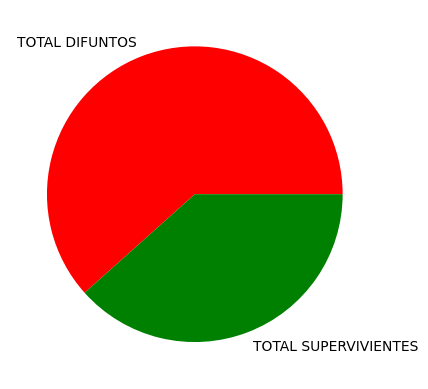

In [34]:
fig_1=plt.figure()
plt.pie(valores_mortalidad.values,labels=["TOTAL DIFUNTOS","TOTAL SUPERVIVIENTES"],colors=("r","green"))

In [35]:
fig_1.savefig("./graficas_slides/mortalidad.png")

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\2705005895.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])
C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\2705005895.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])
C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\2705005895.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])


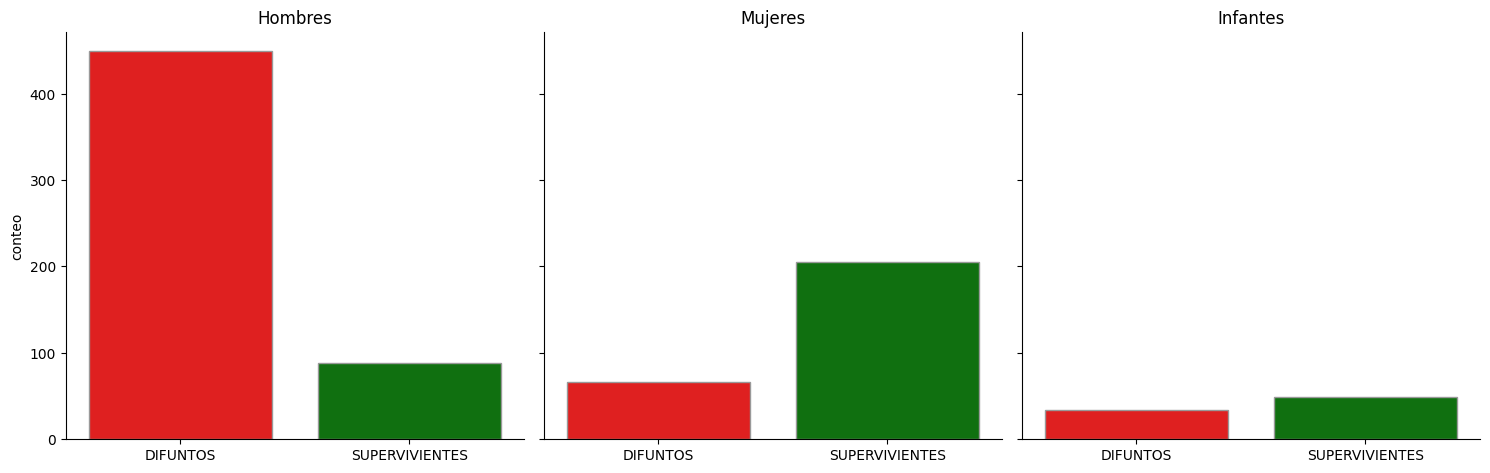

In [53]:
graficos=sns.catplot(x="alive",col="who",hue="alive",kind="count",edgecolor=".6",orient="v",data=df_titanic,palette={"no":"red","yes":"green"})
graficos.set_axis_labels("","conteo")
graficos.axes[0,0].set_title("Hombres")
graficos.axes[0,1].set_title("Mujeres")
graficos.axes[0,2].set_title("Infantes")
for ax in graficos.axes.flat:
    ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])

In [50]:
graficos.savefig("./graficas_slides/niños_primero.png")

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\727561225.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])
C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\727561225.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])
C:\Users\Guillermo\AppData\Local\Temp\ipykernel_456\727561225.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])


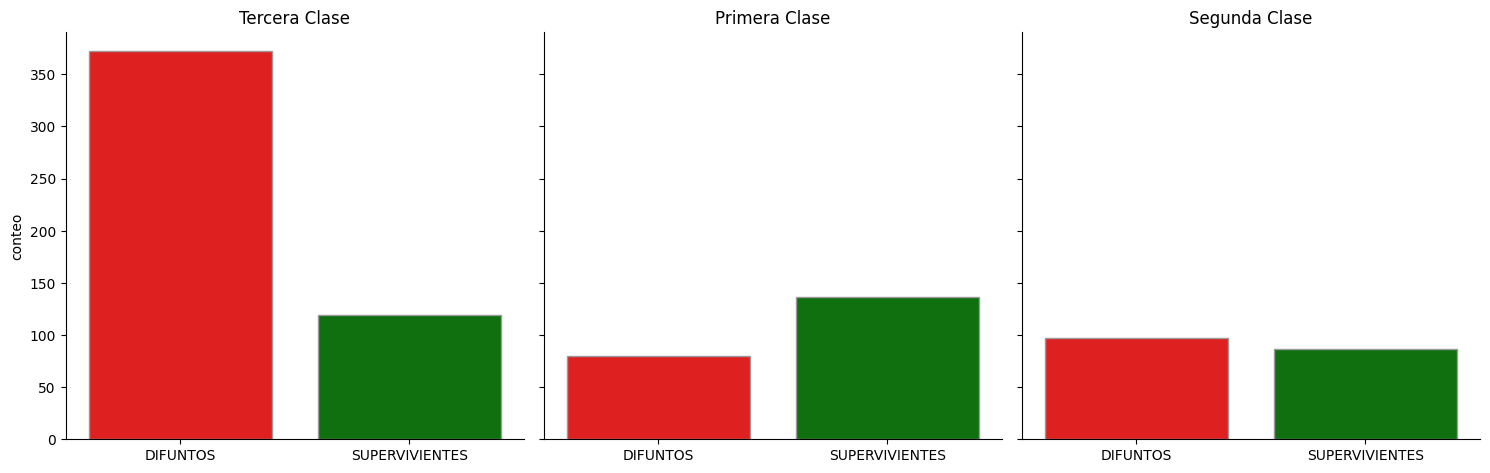

In [56]:
graficos_b=sns.catplot(x="alive",col="class",hue="alive",kind="count",edgecolor=".6",orient="v",data=df_titanic,palette={"no":"red","yes":"green"})
graficos_b.set_axis_labels("","conteo")
graficos_b.axes[0,0].set_title("Tercera Clase")
graficos_b.axes[0,1].set_title("Primera Clase")
graficos_b.axes[0,2].set_title("Segunda Clase")
for ax in graficos_b.axes.flat:
    ax.set_xticklabels(["DIFUNTOS", "SUPERVIVIENTES"])

In [57]:
graficos_b.savefig("./graficas_slides/clases.png")

In [61]:
(df_titanic.groupby("who")["alive"].value_counts(normalize=True)*100).round()

who    alive
child  yes      59.0
       no       41.0
man    no       84.0
       yes      16.0
woman  yes      76.0
       no       24.0
Name: proportion, dtype: float64

In [70]:
(df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True)*100).round()

embark_town  alive
Cherbourg    yes      55.0
             no       45.0
Queenstown   no       61.0
             yes      39.0
Southampton  no       66.0
             yes      34.0
Name: proportion, dtype: float64

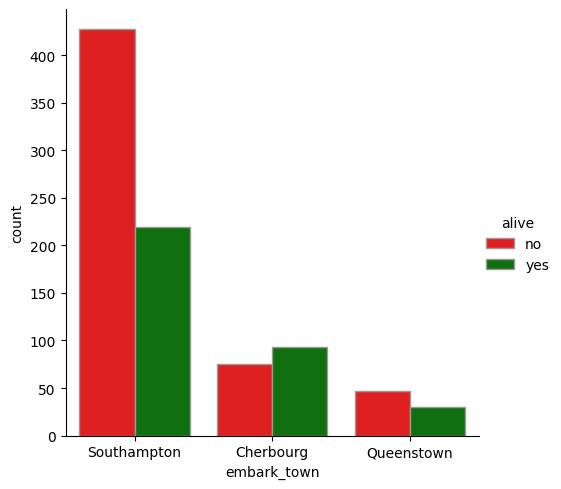

In [67]:
clases_puerto=sns.catplot(x="embark_town",hue="alive",kind="count",edgecolor=".6",orient="v",data=df_titanic.sort_values("alive"),palette={"no":"red","yes":"green"})

Text(0.5, 1.0, 'Queenstown')

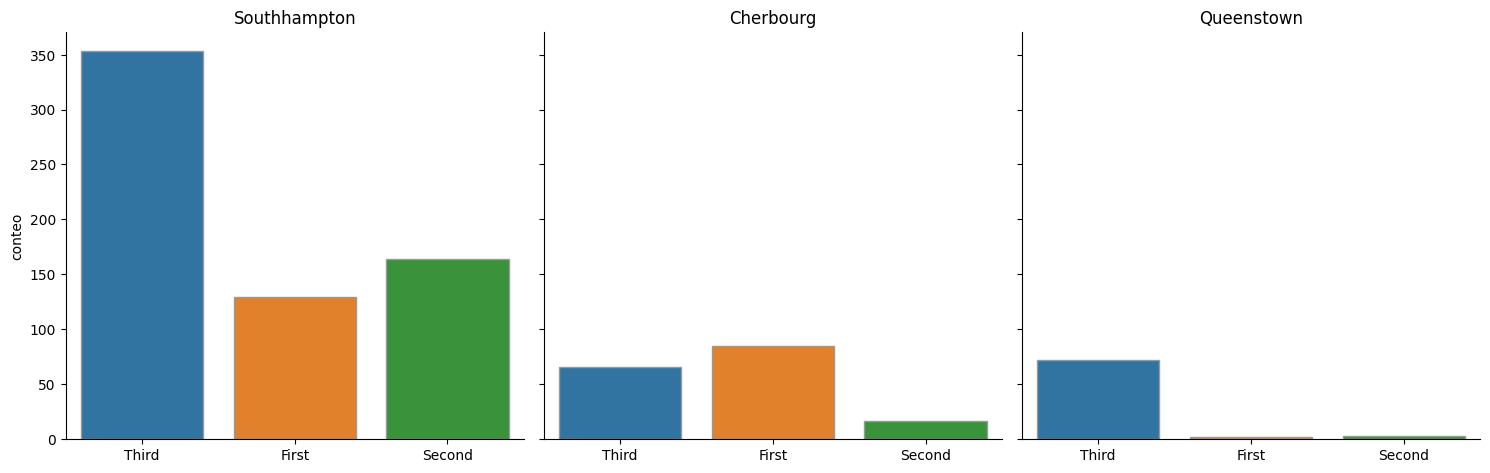

In [69]:
clases_puerto=sns.catplot(x="class",col="embark_town",kind="count",hue="class",edgecolor=".6",orient="v",data=df_titanic)
clases_puerto.set_axis_labels("","conteo")
clases_puerto.axes[0,0].set_title("Southhampton")
clases_puerto.axes[0,1].set_title("Cherbourg")
clases_puerto.axes[0,2].set_title("Queenstown")

In [71]:
clases_puerto.savefig("./graficas_slides/clases_puerto.png")